# Leaky ReLU Activation Function

La Leaky ReLU es una pequeña variación de la ReLU tradicional

La ReLU tradicional “apaga” completamente las neuronas con output "y" negativo (f(y)=0).

La Leaky ReLU sin embargo deja pasar una pequeña pendiente negativa,
para evitar que las neuronas se queden muertas (gradiente cero).

Así mantiene algo de flujo de información incluso cuando la entrada es negativa.

Se usa en redes profundas donde:

ReLU provoca muchas neuronas “muertas” (gradiente siempre 0).

Queremos mantener una pequeña sensibilidad en la zona negativa.

 Dónde se usa normalmente

En redes profundas donde ReLU mata demasiadas neuronas (por ejemplo, GANs, autoencoders, CNNs muy profundas).

En discriminadores de GANs, donde las entradas pueden fluctuar mucho.

En general, cuando se quiere más estabilidad en el entrenamiento sin cambiar el comportamiento básico de ReLU.

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# === Datos de entrada: 3 muestras con 2 características ===
X = torch.tensor([
    [2.0, 1.0],
    [5.0, 1.0],
    [1.0, 3.0]
], device=device)

# === Pesos y bias ===
# Dos características → 1 neurona de salida
W = torch.tensor([[4.0], [-3.0]], device=device)
b = torch.tensor([-5.0], device=device)

# === Resultado del cálculo del perceptrón (pre-activación) ===
y = X @ W + b

print("Resultado del cálculo del perceptrón (y):\n", y)


Resultado del cálculo del perceptrón (y):
 tensor([[  0.],
        [ 12.],
        [-10.]], device='cuda:0')


In [ ]:
# === Función de activación Leaky ReLU ===
# α (negative_slope) controla cuánto deja pasar en la zona negativa
f = torch.nn.LeakyReLU(negative_slope=0.01)

# Aplicamos la activación sobre la salida del perceptrón
y_leaky = f(y)
#El valor negativo no se aplasta completamente a 0,
#sino que se mantiene un poco atenuado (−10 -> −0.1).
print("Salida lineal (resultado del cálculo del perceptrón):\n", y)
print("\nSalida tras Leaky ReLU (α = 0.01):\n", y_leaky)


Salida lineal (resultado del cálculo del perceptrón):
 tensor([[  0.],
        [ 12.],
        [-10.]], device='cuda:0')

Salida tras Leaky ReLU (α = 0.01):
 tensor([[ 0.0000],
        [12.0000],
        [-0.1000]], device='cuda:0')


 Podemos ver el pequeño slope de 0.01 que tiene leaky en comparacion a relu tradicional.

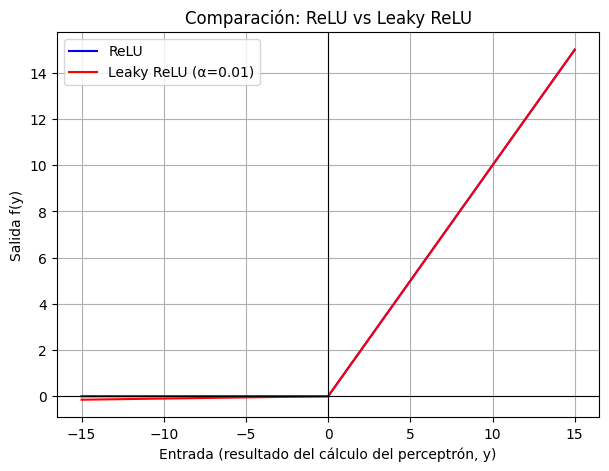

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# === Dominio para visualizar ===
x_plot = torch.linspace(-15, 15, 400)

# === ReLU clásica ===
y_relu = torch.where(x_plot >= 0, x_plot, torch.tensor(0.0))

# === Leaky ReLU (α = 0.01) ===
alpha = 0.01
y_leaky = torch.where(x_plot >= 0, x_plot, alpha * x_plot)

# === Gráfica ===
plt.plot(x_plot.cpu(), y_relu.cpu(), label="ReLU", color="blue")
plt.plot(x_plot.cpu(), y_leaky.cpu(), label=f"Leaky ReLU (α={alpha})", color="red")

plt.title("Comparación: ReLU vs Leaky ReLU")
plt.xlabel("Entrada (resultado del cálculo del perceptrón, y)")
plt.ylabel("Salida f(y)")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()


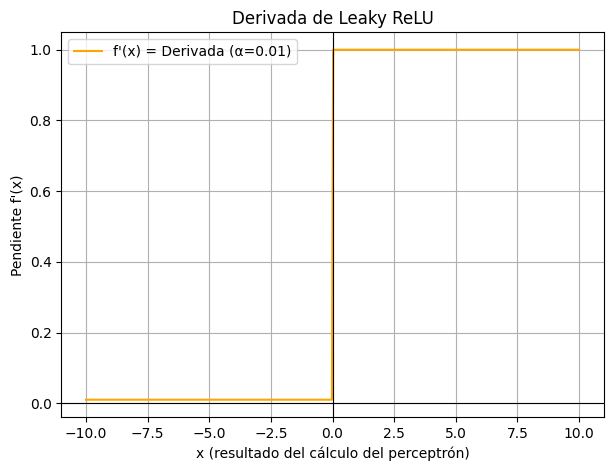

In [ ]:
#Su derivada es constante en ambas regiones
#pero en la zona negativa es un valor ligeramente mayor que cero
# === Dominio ===
x_plot = torch.linspace(-10, 10, 400)

# === Parámetro de fuga ===
alpha = 0.01

# === Derivada de Leaky ReLU ===
dy_dx = torch.where(x_plot >= 0, torch.tensor(1.0), torch.tensor(alpha))

# === Gráfica ===
plt.figure(figsize=(7, 5))
plt.plot(x_plot.cpu(), dy_dx.cpu(), color="orange", label=f"f'(x) = Derivada (α={alpha})")

plt.title("Derivada de Leaky ReLU")
plt.xlabel("x (resultado del cálculo del perceptrón)")
plt.ylabel("Pendiente f'(x)")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()
